# Plotting in python for statistics

First we need to import the modules that will help us get the numbers to the screen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# The following line is only needed in jupyter notebook (i.e. here), not when doing this from command line.
%matplotlib inline

Let's try a quatdratic function

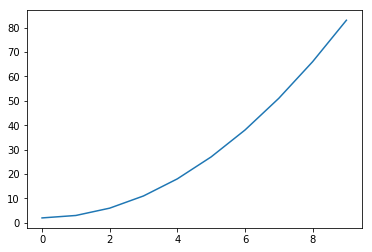

In [2]:
# Create the x-axis data
x = np.arange(10)
# y-axis data is a function of the x-axis data
y = x**2 + 2

plt.figure()    # Create the figure/graph
plt.plot(x, y)  # Plot x vs y
plt.show()      # Tell python to output an image

We can plot multiple lines in the same graph. See how matplotlib automatically scales each axis to the value being plotted.

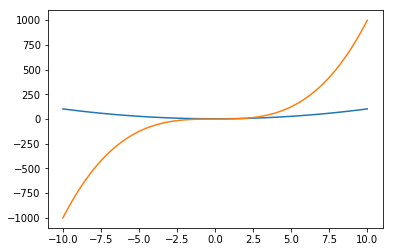

In [3]:
x = np.linspace(-10, 10, 100) # Another way of creating the x-axis, 100 points in the interval [-10, 10]
y1 = x**2 + 2
y2 = x**3 - 1

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


We can define a function for each value as $y_i = f(x_i)$. Note that when plotting f(x) as a line, python will not take the steps in the function into account.

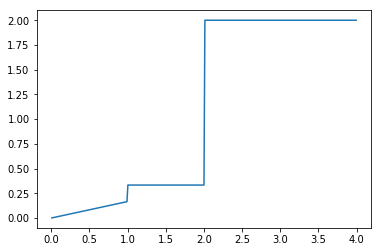

In [4]:
x = np.linspace(-2, 10, 1000)

# Exercise 5.2.1
def f(x):
    if 0 < x <= 1:
        return (1/6)*x
    elif 1 < x <= 2:
        return 1/3
    elif 2 < x <= 4:
        return 2
    else:
        return np.nan
f = np.vectorize(f) # This transforms the function so it is applied for each element of the input data

plt.figure()
plt.plot(x, f(x), '-')
plt.show()


For using a normal distribution, we can import code from scipy for that. Most common statistical functions can be found in scipy.stats, so you do not have to ...

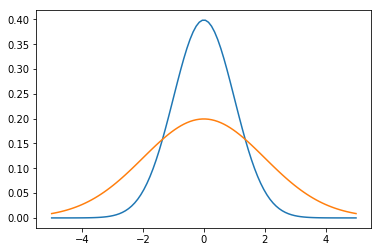

In [5]:
from scipy.stats import norm

x = np.linspace(-5, 5, 100)
y1 = norm(0, 1).pdf(x)
y2 = norm(0, 2).pdf(x)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


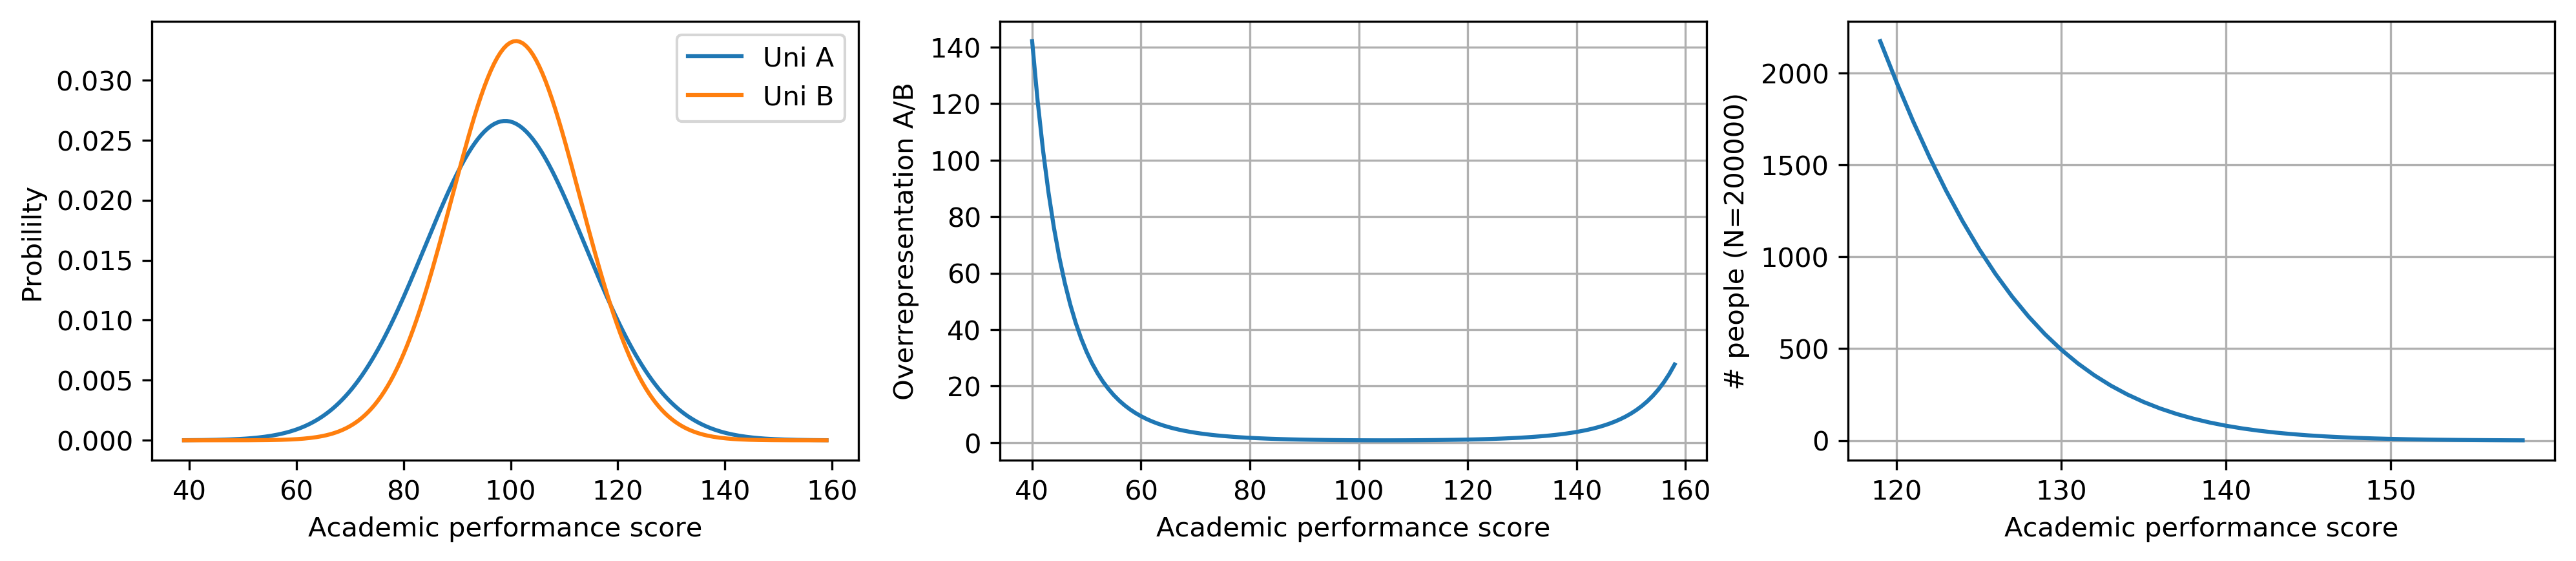

In [6]:
from scipy.stats import norm

#mu_a, sigma_a = 103.08, 14.54
#mu_b, sigma_b = 101.41, 13.55
mu_a, sigma_a = 99, 15
mu_b, sigma_b = 101, 12
Xa = norm(mu_a, sigma_a)
Xb = norm(mu_b, sigma_b)

x = np.linspace(mu_a-4*max(sigma_a, sigma_b), mu_a+4*max(sigma_a, sigma_b), 200)
y_a = Xa.pdf(x)
y_b = Xb.pdf(x)

ap = np.floor(np.arange(mu_a-6*max(sigma_a, sigma_b), mu_a+6*max(sigma_a, sigma_b)))
overrepr_a = (Xa.cdf(ap+.5)-Xa.cdf(ap-.5))/(Xb.cdf(ap+.5)-Xb.cdf(ap-.5))
N = 200000
#popN = N/2*(Xa.cdf(ap+.5)-Xa.cdf(ap-.5)) + N/2*(Xb.cdf(ap+.5)-Xb.cdf(ap-.5))
popN = N/2*Xa.pdf(ap) + N/2*Xb.pdf(ap)

fig = plt.figure(figsize=(16, 3), dpi=300)
ax = fig.subplots(1, 3)

ax[0].plot(x, y_a, label="Uni A")
ax[0].plot(x, y_b, label="Uni B")
ax[0].set_xlabel("Academic performance score")
ax[0].set_ylabel("Probililty")
ax[0].legend()

ax[1].plot(ap[popN>1], overrepr_a[popN>1], label="")
ax[1].set_ylabel("Overrepresentation A/B")
ax[1].set_xlabel("Academic performance score")
ax[1].grid()

ax[2].plot(ap[(popN>1)*(ap>=110)*(overrepr_a>1)],
           popN[(popN>1)*(ap>=110)*(overrepr_a>1)])
ax[2].set_ylabel("# people (N=%i)" % N)
ax[2].set_xlabel("Academic performance score")
ax[2].grid()
plt.show()

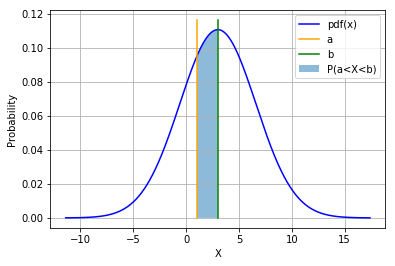

P(X > a)=0.711
P(X < b)=0.500
P(a < X < b)=0.211


In [7]:
from scipy.stats import norm

mu = 3
sigma = 3.6
a = 1
b = 3

assert a<=b, "a must be equal or smaller than b"
distr = norm(mu, sigma)
x = np.linspace(distr.mean()-4*distr.std(), distr.mean()+4*distr.std(), 1000)
y = distr.pdf(x)

plt.figure()
plt.plot(x, y, 'blue', label="pdf(x)")
if a >= np.min(x):
    plt.plot([a, a], [0, np.max(y)*1.05], 'orange', label="a")
if b <= np.max(x):
    plt.plot([b, b], [0, np.max(y)*1.05], 'green', label="b")
fillmask = a<=x
fillmask *= x<=b
plt.fill_between(x[fillmask], y[fillmask], alpha=.5, label="P(a<X<b)")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("X")
plt.grid()
plt.show()

print("P(X > a)=%.3f" % (1 - distr.cdf(a)))
print("P(X < b)=%.3f" % (distr.cdf(b)))
print("P(a < X < b)=%.3f" % (distr.cdf(b) - distr.cdf(a)))

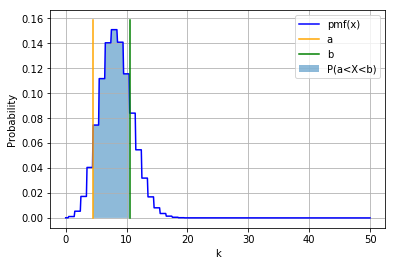

P(X > a)=0.936
P(X < b)=0.799
P(a < X < b)=0.734


In [8]:
from scipy.stats import binom

n = 50
p = 1/6
a = 5
b = 10

assert a<=b, "a must be equal or smaller than b"
assert 0 <= p and p <= 1, "p must be a probability"
distr = binom(n=n, p=p)
k = np.arange(n+1)
x = np.linspace(np.min(k), np.max(k), max(n, 500))
y = distr.pmf(np.round(x))

plt.figure()
plt.plot(x, y, 'b', label="pmf(x)")
if a >= np.min(x):
    plt.plot([a-.5, a-.5], [0, np.max(y)*1.05], 'orange', label="a")
if b <= np.max(x):
    plt.plot([b+.5, b+.5], [0, np.max(y)*1.05], 'green', label="b")
fillmask = (a-.5)<=x
fillmask *= x<=(b+.5)
plt.fill_between(x[fillmask], y[fillmask], alpha=.5, label="P(a<X<b)")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("k")
plt.grid()
plt.show()

print("P(X > a)=%.3f" % np.sum([distr.pmf(k) for k in range(a, n+1)]))
print("P(X < b)=%.3f" % np.sum([distr.pmf(k) for k in range(0, b+1)]))
print("P(a < X < b)=%.3f" % np.sum([distr.pmf(k) for k in range(a, b+1)]))

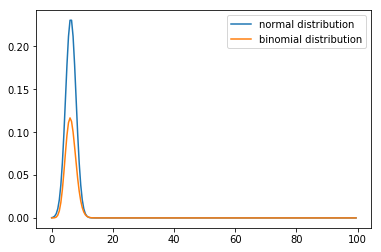

In [9]:
from scipy.stats import binom

N = 200
p = .0625
k = np.arange(N)
x = 100*k/N
y1 = norm(100*p, 100/N*np.sqrt(N*p*(1-p))).pdf(x)
y2 = binom(n=N, p=p).pmf(k)

plt.figure()
plt.plot(x, y1, label="normal distribution")
plt.plot(x, y2, label="binomial distribution")
plt.legend()
plt.show()


The normalization for continous and discrete distributions are different. The integral of a continous PDF should be 1. However, for a PMF, it should sum to 1.  

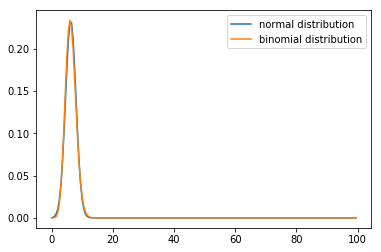

In [10]:
N = 200
p = .0625
k = np.arange(N)
x = 100*k/N
y1 = norm(100*p, 100/N*np.sqrt(N*p*(1-p))).pdf(x)
y2 = binom(n=N, p=p).pmf(k)

y2 /= np.trapz(y2, x) # Normalization

plt.figure()
plt.plot(x, y1, label="normal distribution")
plt.plot(x, y2, label="binomial distribution")
plt.legend()
plt.show()


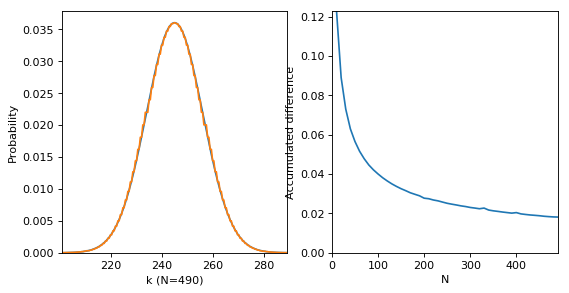

In [11]:
import matplotlib.pylab as plt
import numpy as np
import time
from scipy.stats import binom, norm
from IPython import display

fps = 20
N = 50
p = .5

N = range(10, 500, 10)
diff = list()
diff_n = list()

# Set up the plotting
fig = plt.figure(figsize=(8, 4), dpi=80)
#fig.tight_layout()
ax = fig.subplots(1, 2)
p1 = ax[0].plot(0, 0, label="normal aproximation")
p2 = ax[0].plot(0, 0, label="binomial distribution")
ax[0].set_ylabel("Probability")
p3 = ax[1].plot(0, 0)
ax[1].set_xlabel("N")
ax[1].set_ylabel("Accumulated difference")

for n in N:
    t = time.time()
    try:
        display.display(plt.gcf())
        display.clear_output(wait=True)
    
        k = np.round(np.linspace(1, n, 1000))
        x = np.linspace(np.min(k), np.max(k), 1000)
        normal = norm(n*p, np.sqrt(n*p*(1-p)))
        y1 = normal.pdf(x)
        y2 = binom(n=n, p=p).pmf(k)
        
        p1[0].set_data(x, y1)
        p2[0].set_data(x, y2)
        ax[0].axis((max(0, normal.mean()-normal.std()*4),
                    min(normal.mean()+normal.std()*4, np.max(N)),
                    0, normal.pdf(normal.mean())*1.05))
        ax[0].set_xlabel("k (N=%i)" % n)

        diff.append(np.trapz(np.abs(y2-y1), x))
        diff_n.append(n)
        p3[0].set_data(diff_n, diff)
        ax[1].axis((1, np.max(N), 0, np.max(diff)))

        time.sleep(max(0, t+1/fps-time.time()))
    except KeyboardInterrupt:
        break